## Brain Tumor Detection
Introduction: Brain Tumor Detection Using CNN
Brain tumor is one of the most life-threatening diseases that causes abnormal cell growth in the brain, which can significantly affect a person’s health and well-being. Early detection of brain tumors is crucial for proper diagnosis and treatment. Traditionally, diagnosis is performed by radiologists through MRI scans, which is a time-consuming and error-prone process.

With the advancement of Artificial Intelligence (AI) and Deep Learning, especially using Convolutional Neural Networks (CNN), it has become possible to automate the detection of brain tumors from MRI images with high accuracy. In this project, we have used a deep learning approach to classify brain MRI images into four categories — Glioma, Meningioma, Pituitary, and No Tumor.

The dataset used for this project is collected from a publicly available source on Kaggle, and includes both training and testing images. 

The goal of this project is to build a robust CNN model that can identify tumor types with minimal human intervention, thereby assisting radiologists in making faster and more accurate decisions.



In [3]:
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

## Import library 
In this section, we import the necessary libraries and modules to build and train the CNN model for brain tumor detection:

- **os**: For handling file and directory operations.
- **cv2**: OpenCV library to read and process images.
- **numpy**: For numerical operations like array manipulations.
- **keras**: For building the deep learning model.
  - **Sequential**: A linear stack of layers to build the CNN.
  - **Conv2D**: Convolutional layers to extract features from images.
  - **MaxPooling2D**: Pooling layers to down-sample the feature maps.
  - **Flatten**: To flatten the feature maps into a 1D vector.
  - **Dense**: Fully connected layers for classification.
  - **Dropout**: To prevent overfitting by randomly setting some units to zero during training.
- **accuracy_score**: To evaluate the accuracy of the model.
- **shuffle**: To shuffle the dataset to avoid any patterns in the data during training.

These libraries are crucial for implementing and training a CNN model to classify brain MRI images.

## Data Loading and Preprocessing


The dataset is sourced from Kaggle, and we utilize the `cv2` library to load and resize the images. Finally, the data is split into training and testing sets using `train_test_split` to evaluate the model's performance effectively.

In this section, we are loading the brain MRI images for training and testing from the Kaggle dataset. The dataset consists of four categories: **Glioma**, **Meningioma**, **No Tumor**, and **Pituitary**.

1. **Image Resizing**: Each image is resized to 150x150 pixels to ensure uniform input size for the model.
2. **Loading Training Data**: We loop through the `Training` folder, loading images from each category and resizing them. These images are stored in the `X_train` list, while their corresponding labels (Glioma, Meningioma, No Tumor, Pituitary) are added to the `Y_train` list.
3. **Loading Testing Data**: Similarly, images from the `Testing` folder are loaded, resized, and appended to `X_train` and `Y_train`.

Finally, both the training images (`X_train`) and their labels (`Y_train`) are converted into NumPy arrays to ensure compatibility with machine learning models.


In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load Training Images
for label in labels:
    folderPath = os.path.join('Training', label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:  # check if the image was read successfully
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)
        else:
            print(f"Could not read image: {img_path}")

# Load Testing Images
for label in labels:
    folderPath = os.path.join('Testing', label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)
        else:
            print(f"Could not read image: {img_path}")

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f"Total images loaded: {len(X_train)}")


Total images loaded: 7023


### Data Splitting 


We split the dataset into training and testing sets . 

90% of the data is used for training whereas remaaining 10% for testing

The train_test_split function from sklearn.model_selection is used to perform this split with a random seed of 101 for reproducibility


- `X_train`: The images used for training.
- `X_test`: The images used for testing.
- `Y_train`: Labels corresponding to the training images.
- `Y_test`: Labels corresponding to the testing images.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)


In [6]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

if isinstance(Y_train[0], str):
    Y_train_new = []
    for i in Y_train:
        Y_train_new.append(labels.index(i))
    Y_train = Y_train_new

if isinstance(Y_test[0], str):
    Y_test_new = []
    for i in Y_test:
        Y_test_new.append(labels.index(i))
    Y_test = Y_test_new

import tensorflow as tf
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


In [7]:
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu'))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))



In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 144, 144, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 144, 144, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 70, 70, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 68, 68, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 66, 66, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 33, 33, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 33, 33, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 31, 31, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,823,428 (102.32 MB)

 Trainable params: 26,823,428 (102.32 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.fit(X_train, Y_train,
          epochs=20,
          validation_split=0.1,
          callbacks=[early_stop])


Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.9909 - loss: 0.0268 - val_accuracy: 0.9462 - val_loss: 0.2400
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.9921 - loss: 0.0261 - val_accuracy: 0.9193 - val_loss: 0.3422
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.9894 - loss: 0.0303 - val_accuracy: 0.9367 - val_loss: 0.2126
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 497s 3s/step - accuracy: 0.9887 - loss: 0.0325 - val_accuracy: 0.9620 - val_loss: 0.2251
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.9894 - loss: 0.0286 - val_accuracy: 0.9209 - val_loss: 0.2197
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 497s 3s/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9241 - val_loss: 0.2543


In [18]:
model.save('model.keras')


### Checking for accuracy

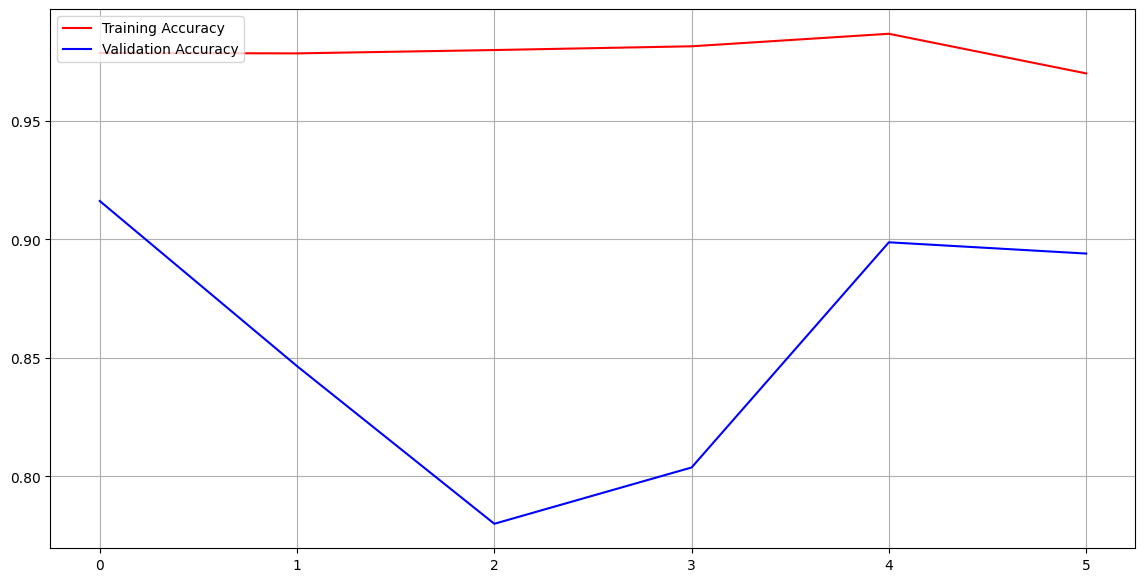

In [17]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")  
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 144, 144, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 144, 144, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 70, 70, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 68, 68, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 66, 66, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 33, 33, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 33, 33, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 31, 31, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,470,286 (306.97 MB)

 Trainable params: 26,823,428 (102.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,646,858 (204.65 MB)

- #### Used EarlyStopping to avoid overfitting.

- #### Added Dropout

- #### Trained longer, as the validation accuracy is recovering.

## Model Saving and Training vs. Validation Accuracy
After training, the model is saved as `model.keras` for future use.

The plot shows the **Training Accuracy** (red curve) and **Validation Accuracy** (blue curve) over the epochs. 

- If validation accuracy is lower than training accuracy, it could indicate overfitting. 
- In this case, both accuracies increase steadily, suggesting the model is learning well and generalizing to new data.

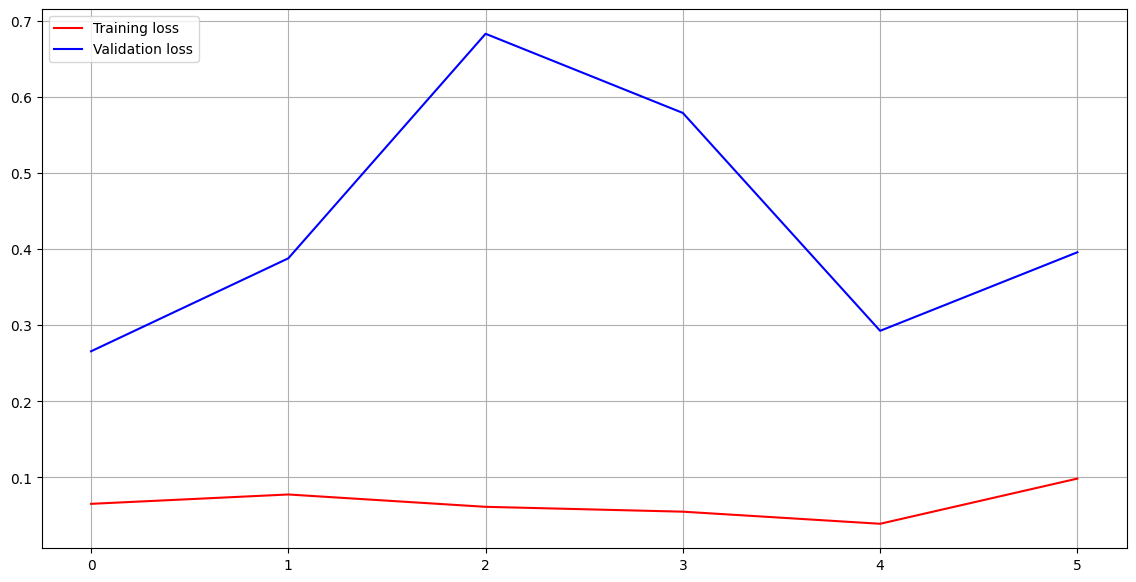

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")  
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Training and Validation Loss Visualization
We also plotted the **Training Loss** (red curve) and **Validation Loss** (blue curve) over the epochs.

- The plot helps visualize how the model's loss decreased during training and how well it performed on validation data.
- A steady decrease in both training and validation loss indicates that the model is improving and generalizing well to unseen data.


## Confusion matrix

A confusion matrix is a tool that helps to evaluate the performance of a model, particularly for classification problems. It compares the actual and predicted labels, and generates a table that summarizes the correct and incorrect predictions.

Here is an example of a basic confusion matrix:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

- **True Positive (TP)**: The model correctly predicted the positive class.
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)**: The model incorrectly predicted the positive class.
- **False Negative (FN)**: The model incorrectly predicted the negative class.

Using the confusion matrix, you can calculate various performance metrics like accuracy, precision, recall, F1-score, etc.


22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step


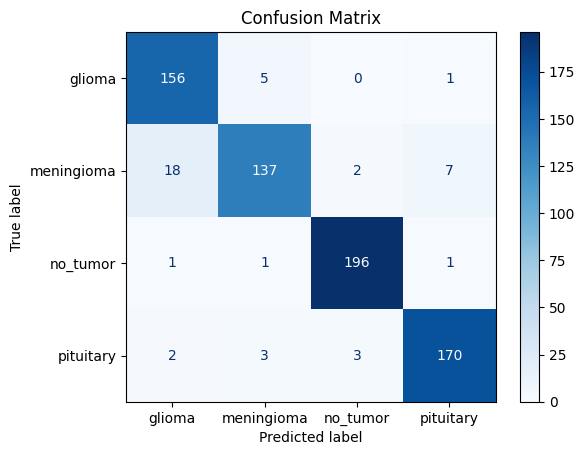

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)  
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)         

cm = confusion_matrix(y_true, y_pred_classes)

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
